# 20176005 Jegyeong Kim

# Assign. 1 - Creating and Manipulating Graphs

Eight people were asked to choose 3 movies that they would most enjoy watching for the upcoming movie night. These choices are stored in the file `Movie_Choices.txt`.

A second file, `Relationships.txt`, has data on the relationships between different people. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two people haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline

path = 'E:\\unist\\2-1\\textmining\\Assign1\\'

# This is the set of people
people = set(['Pablo',
              'Lee',
              'Georgia',
              'Vincent',
              'Andy',
              'Frida',
              'Joan',
              'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
def answer_one():
    
    movie_choices = nx.read_adjlist(path+'Movie_Choices.txt', delimiter='\t')
    
    B = nx.Graph()
    B.add_nodes_from(people, bipartite=0)
    B.add_nodes_from(movies, bipartite=1)
    B.add_edges_from(movie_choices.edges())
    
    return B

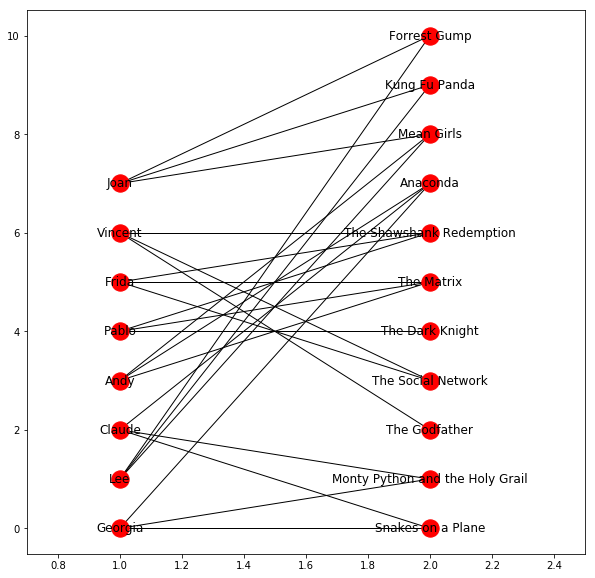

In [3]:
# draw graph
ONE = answer_one()
pos = dict()
pos.update((n, (1, i)) for i, n in enumerate(bipartite.sets(ONE)[1]))
pos.update((n, (2, i)) for i, n in enumerate(bipartite.sets(ONE)[0]))

plt.figure(figsize=(10,10)), plt.xlim(0.7, 2.5)
nx.draw_networkx(ONE, pos)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and people have the value `'person'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'person}`*

In [4]:
def answer_two():
    
    B = answer_one()
    B.add_nodes_from(people, type = 'person')
    B.add_nodes_from(movies, type = 'movie')
    
    return B

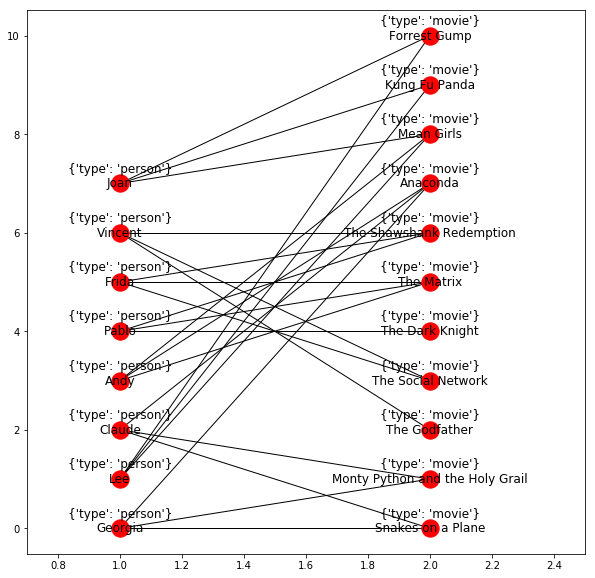

In [5]:
# draw graph for question 2

TWO = answer_two()

pos2 = dict()
pos2.update((n, (1, i)) for i, n in enumerate(bipartite.sets(TWO)[1]))
pos2.update((n, (2, i)) for i, n in enumerate(bipartite.sets(TWO)[0]))

pos_attrs = {}
for node, p in pos2.items():
    pos_attrs[node] = (p[0], p[1] + 0.3)

node_attr = nx.get_node_attributes(TWO,'type')
node_attrs={}
for node, attr in node_attr.items():
    node_attrs[node] = "{'type': '" + attr + "'}"

plt.figure(figsize=(10,10)), plt.xlim(0.7, 2.5)
nx.draw_networkx(TWO, pos2)
nx.draw_networkx_labels(TWO, pos_attrs, labels=node_attrs)
plt.show()

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of people have in common.

*This function should return a weighted projected graph.*

In [6]:
def answer_three():
        
    B = answer_two()
    WPG = bipartite.weighted_projected_graph(B, people)
    
    return WPG

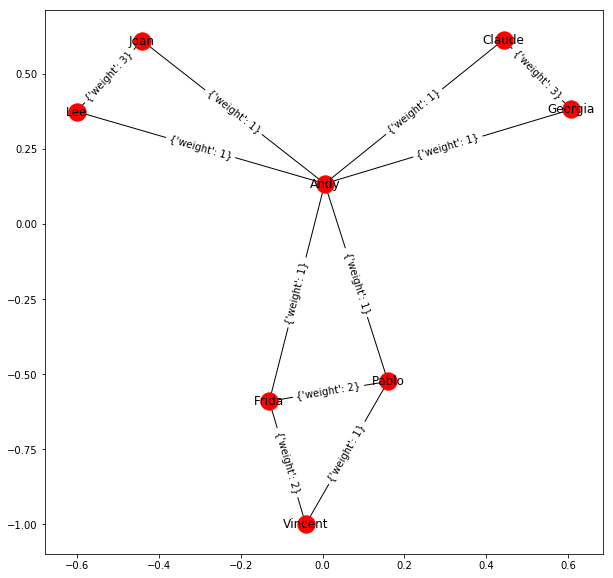

In [7]:
# draw weighted projected graph for question 3

THREE = answer_three()

plt.figure(figsize=(10,10))
pos3 = nx.spring_layout(THREE)
nx.draw_networkx(THREE, pos3)
nx.draw_networkx_edge_labels(THREE, pos3)
plt.show()

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between people relationship scores and the number of movies they have in common. If two people have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [12]:
def answer_four():
        
    B = answer_three()
    common_movies1 = nx.to_pandas_edgelist(B, nodelist=people)
    common_movies2 = common_movies1.copy()
    common_movies2.columns = ['target', 'source', 'weight']
    common_movies = pd.merge(common_movies1, common_movies2, 'outer')
    relationship = pd.read_table(path+'Relationships.txt', header=None, names=['source', 'target', 'relation_score'])
    df = pd.merge(relationship, common_movies, 'left').fillna(0)
    
    return  df.corr().iloc[0,1]

In [13]:
answer_four()

0.7883962221733476